# 线性模型

## 基本形式

![线性模型](images/linear/线性模型.jpg)

给定由d个属性描述的示例$x = (x_1,x_2,...,x_d)$,其中$x_i$是x在第i个属性上的取值，线性模型（linear model）试图学得一个通过属性的线性组合来进行预测的函数，即

$f(x) = w_1x_1 + w_2x_2 + ... + w_dx_d + b$ ——式（1）

一般用向量形式写成：

$f(x) = w^Tx + b$ ——式（2）

线性模型形式简单，易于建模，但却蕴含了机器学习中一些重要的基本思想。

许多功能强大的非线性模型可在线性模型的基础上通过引入层级结构或高维映射而得到。

此外，系数$w$直观表达了各属性$x_i$在预测中的重要性，因此线性模型有很好的可解释性（comprehensibility）。

例如：若在西瓜问题中学得$f_{好瓜}(x) = 0.2 x_{色泽} + 0.5x_{根蒂}+0.3x_{敲声} +1$，则意味着通过综合考虑，色泽、根蒂和敲声来判断瓜好不好，其中根蒂最重要。

## 线性回归

给定训练样本集$D = {(x_1,y_1),(x_2,y_2),...(x_m,y_m)}， 其中 x_i =(x_{i1};x_{i2};...;x_{id}), y_i \in R$。“线性回归”（linear regression）试图学得一个线性模型以尽可能准确地预测实值输出标记。

先考虑一种最简单的情形：输入属性的数目只有一个x，即$ D = {(x_i,y_i)}_{i=1}^m$，其中$x_i \in R$. 

> 对离散属性，若属性值间存在“序”（order）关系，可通过连续化转化为连续值。例如：身高的“高”、“矮”可转化为{1.0，0.0}；又例如三值属性“高度”取值“高、中、低”，可转化为{1.0，0.5，0.0}。
> 若属性值间不存在序关系，假定有k个属性值，则通常转化为k维向量，例如属性“瓜的类型”取值“西瓜、冬瓜、南瓜”，可转化为((0,0,1),(0,1,0),(1,0,0))。

线性回归试图学得：

$f(x_i) = wx_i+b，使得f(x_i) \simeq y_i$ ——式（3）

**如何确定$w和b$呢？显然，关键在于如何衡量$f(x)与y$之间的差别。**

**均方误差是回归任务中最常用的性能度量**，因此我们可以试图让均方误差最小化。即：

$(w^*,b^*) = argmin_{w,b}\sum_{i=1}^m (f(x_i)-y_i)^2 = argmin_{w,b}\sum_{i=1}^m (y_i -wx_i -b)^2$  ——式（4）

> 均方误差（MSE）就是求（真值-预测值）的平方的均值。它有很好的几何意义，它对应了常用的欧式距离（Euclidean distance）。
$MSE = \frac{1}{m}\sum_{i=1}^m (y_i -f(x_i))^2$

基于MSE最小化进行模型求解的方法称为**最小二乘法（Least square method，LSM）**。在线性回归中，最小二乘法就是试图找一条直线，使所有样本到直线上的欧式距离之和最小。

![最小二乘法原理](images/linear/最小二乘法原理.jpg)

**求解$w和b$使$E_{(w,b)} = \sum_{i=1}^m(y_i -wx_i -b)^2$最小化的过程，  
称为线性回归模型的最小二乘“参数估计”（parameter estimation）**。  

求解过程如下：

1.可以将$E_{(w,b)}$分别求导，得到：

$\frac{\partial E(w,b)}{\partial w} = 2(w\sum_{i=1}^{m}x_i^2) - \sum_{i=1}^m(y_i-b)x_i$  ——式（5）

$\frac{\partial E(w,b)}{\partial b} = 2(mb - \sum_{i=1}^m(y_i-wx_i))$  ——式（6）

2.然后令式（5）、（6）为零，可以得到$w和b$最优解的闭式解：

$w = \frac{\sum_{i=1}^m y_i(x_i-\overline x)}{\sum_{i=1}^m x_i^2 - \frac{1}{m}(\sum_{i=1}^m x_i)^2}$ ——式（7）

$b = \frac{1}{m} \sum_{i=1}^m(y_i - wx_i)$ ——式（8）

其中：$\overline x = \frac{1}{m} \sum_{i=1}^m(x_i)$ 是x的均值。

以上就是所谓的**一元线性回归**的基本求解思路。更一般的情形是数据集D中每个样本均含有d个属性描述，此时我们试图学得：

$f(x_i) = w^Tx_i +b,使得f(x_i) \simeq y_i$

这里的$x_i = (x_i^1,x_i^2,...,x_i^d)$。求解这个模型的过程就是**多元线性回归（multivariate linear regression）**。

类似的，可利用最小二乘法对$w和b$进行估计，为了便于讨论，我们把$w和b$吸收入向量形式$\hat w = (w;b)$，相应的，把数据集D表示为一个$m \times (d+1)$大小的矩阵X，其中每行对应一个示例，该行前d个元素对应于示例的d个属性值，最后一个元素恒为1，即：

$$
X = 
 \left [
 \begin{matrix}
   x_{11} & x_{12} &... & x_{1d} &1\\
   x_{21} & x_{22} &... & x_{2d} &1\\
   ...  &...  &...  &...&...\\
   x_{m1} & x_{m2} &... & x_{md}&1
  \end{matrix}
  \right ] 
  = 
 \left [
 \begin{matrix}
   x_1^T & 1 \\
   x_2^T & 1 \\
   ...  &... \\
   x_m^T & 1
  \end{matrix}
  \right ] 
$$

再把标记也写成向量形式 $y=(y_1;y_2;...;y_m)$，则类似于式（4），有：

$\hat {w}^* = argmin_{\hat w}(y-X\hat{w})^T(y-X\hat{w})$  ——式（9）

令$E_\hat{w} = (y-X\hat{w})^T(y-X\hat{w})$ ,对$\hat{w}$求导得到：

$\frac{\partial E_\hat{w}}{\partial w} = 2 X^T(X \hat{w} - y)$  ——式（10）

令上式为零，可得$\hat{w}$最优解的闭式解，但由于设计矩阵逆的运算，比单变量情形复杂一些。

下面做一个简单讨论：

当$X^TX$为满秩矩阵（full-rank matrix）或正定矩阵（positive definite matrix）时，令式（10）为零可得：

$w^* = (X^TX)^{-1}X^Ty$ ——式（11）

其中$ (X^TX)^{-1}$是矩阵 $ (X^TX)$的矩阵。令$\hat{x}_i = (x_i;1)$，则**最终学得的多元回归线性回归模型为：**

$f(\hat{x}_i) = \hat{x}_i^T(X^TX)^{-1}X^Ty$ ——式（12）


### 使用sklearn进行线性回归

sklearn.linear_model模块实现了广义线性模型。

它包括简单线性回归、岭回归（Ridge regression），贝叶斯回归（Bayesian Regression），Lasso回归和弹性网络估计（Elastic Net estimators）。它还实现了Stochastic Gradient Descent相关算法。

### sklearn中的一般线性回归

sklearn中，使用sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)可以实现简单的线性回归预测。这个类实现了基于最小二乘法的线性回归。

在sklearn中，对于线性模型$f(x_i) = wx_i+b$的回归预测，有

- coef_为系数$ w_1,w_2,...,w_n$

- intercept_ 为常数 $w_0$ 或b


下面举例说明。

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# 真值 y = 1 * x_0 + 2 * x_1 + 3;
y = np.dot(X, np.array([1, 2])) + 3

reg = LinearRegression()
reg.fit(X, y) # reg = LinearRegression().fit(X,y)

print("学得线性模型的系数向量w为{}".format(reg.coef_))
print("学得线性模型的b为{}".format(reg.intercept_))
y1 = reg.predict(np.array([[3, 5]]))
print("真值 y = {},预测值y1={}".format(1*3+2*5+3,y1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
学得线性模型的系数向量w为[1. 2.]
学得线性模型的b为3.0000000000000018
真值 y = 16,预测值y1=[16.]


**实例：预测糖尿病**

糖尿病患生化检测指标数据集，记录了442名糖尿病患者的生化检测指标。包括：年龄，性别，体重指数，平均血压和6个血清测量值。

> 这10个特征中的每个特征都已经被处理成0均值，方差归一化的特征值，
> $x^* = \frac{x - \mu}{\delta}$

每个样本对应的输出是“the response of interest”，指的是一年后的疾病进展的定量测量值。

下面的例子中，选择了0均值、方差归一化的属性“Age”作为x，来拟合“疾病进展测量值”。

#### 准备数据

使用sklearn内置的数据调用方法，获取病患的疾病统计数据。

In [5]:
import pandas as pd
from sklearn import datasets, linear_model

# 调用糖尿病数据
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data ,columns=['Age','Sex','BMI','ABP',
                           'S1','S2','S3','S4','S5','S6'])
df['The response of interest'] = diabetes.target
print(df.head())


        Age       Sex       BMI       ABP        S1        S2        S3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         S4        S5        S6  The response of interest  
0 -0.002592  0.019908 -0.017646                     151.0  
1 -0.039493 -0.068330 -0.092204                      75.0  
2 -0.002592  0.002864 -0.025930                     141.0  
3  0.034309  0.022692 -0.009362                     206.0  
4 -0.002592 -0.031991 -0.046641                     135.0  


#### 分析数据

利用图形化工具对各个属性值进行两两关联可视化

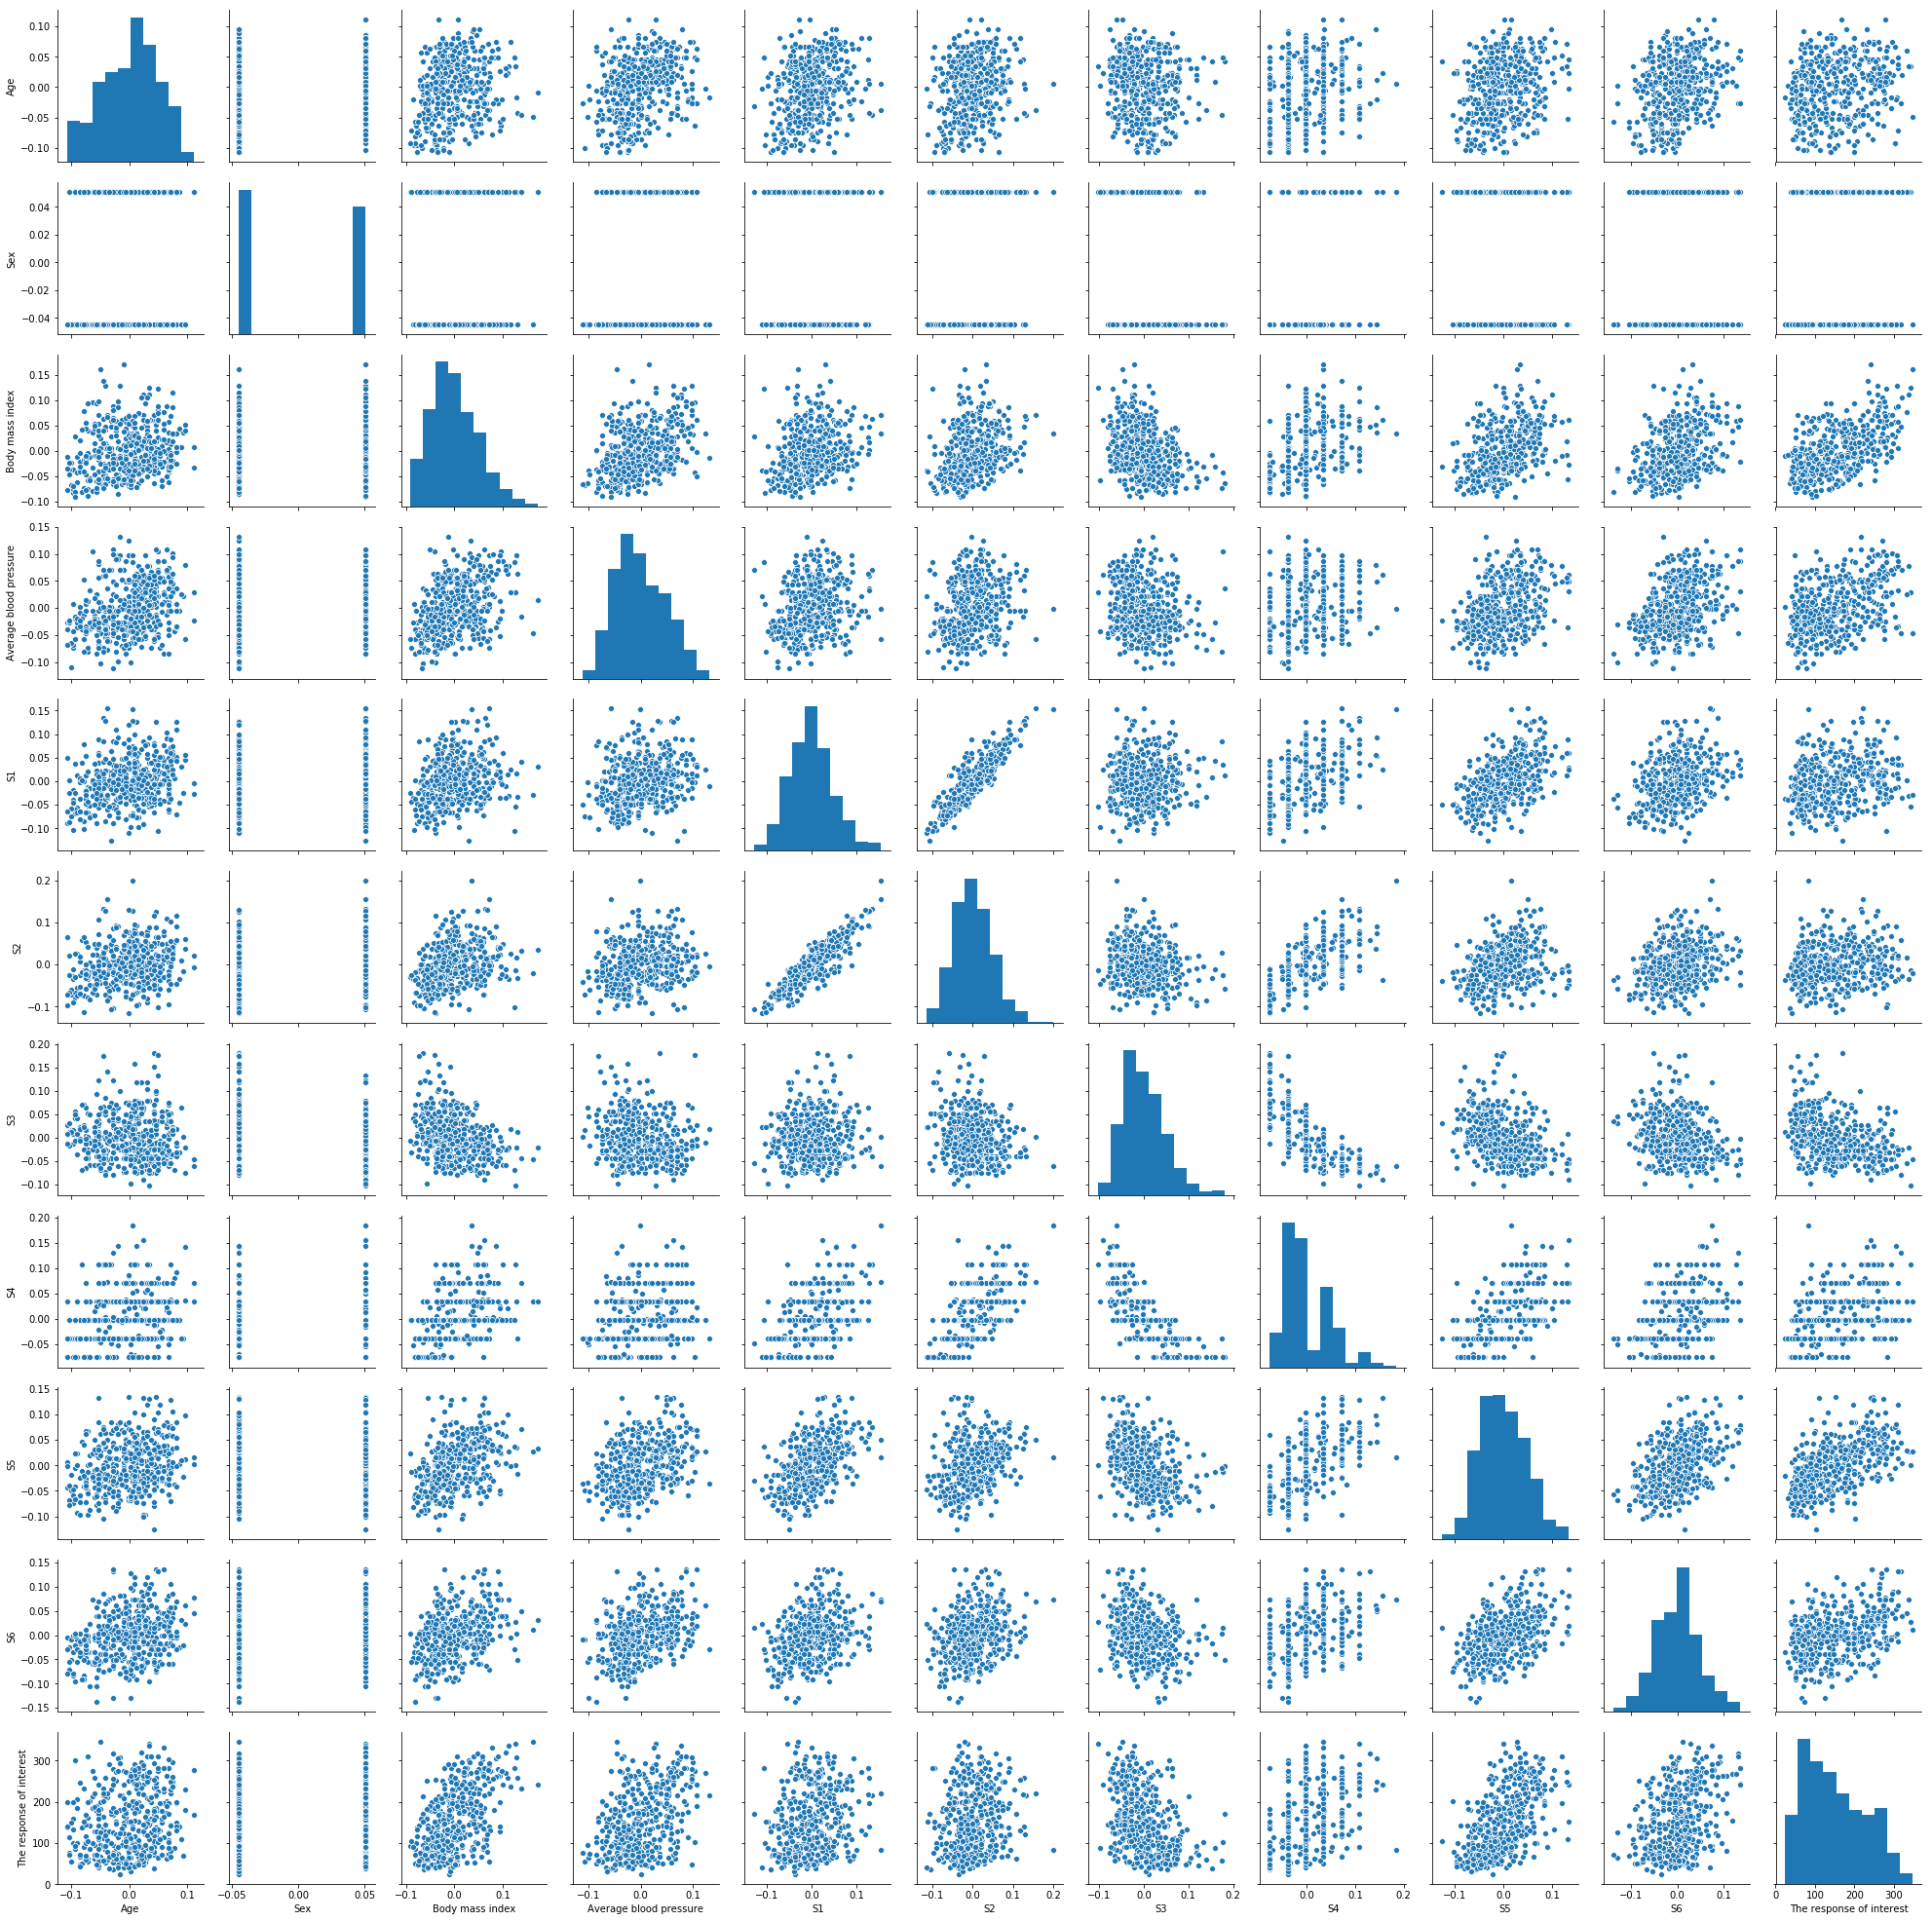

In [3]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

# 调用糖尿病数据
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data,columns=['Age','Sex',
                                         'BMI','ABP',
                                         'S1','S2',
                                         'S3','S4',
                                         'S5','S6'])
df['The response of interest'] = diabetes.target

sns.pairplot(df)
"""
fig = plt.figure(figsize=(6,6),dpi=80)

ax1 = fig.subplot(12)
plt.scatter(df['Age'],df['The response of interest'] )

plt.ylabel('The response of interest')
plt.xlabel('Age')

plt.show()
"""



#### 训练模型并形成预测

In [7]:
# 下面使用sklearn中的一般线性回归进行预测
from sklearn.linear_model import LinearRegression
# 首先将数据划分为训练集和测试集
df_train = df.iloc[:-20 , :] 
df_test =df.iloc[-20: , :]

# 生成线性回归对象
regr = LinearRegression()
# 使用训练集训练模型
regr.fit(df_train.iloc[:,:-1],df_train['The response of interest'])
# 对测试集进行测试
diabetes_y_pred = regr.predict(df_test.iloc[:,:-1])
# 输出线性模型的系数
print('线性模型的系数: \n', regr.coef_)
print('线性模型的常数项: \n', regr.intercept_)
print("预测结果为：{}".format(diabetes_y_pred))
print("测试集真值：{}".format(df_test['The response of interest']))
# 输出回归预测值的均方误差
print("MSE: %.2f"  % mean_squared_error(df_test['The response of interest'], diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('方差分值: %.2f' % r2_score(df_test['The response of interest'], diabetes_y_pred))


线性模型的系数: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
线性模型的常数项: 
 152.76430691633442
预测结果为：[197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]
测试集真值：422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: The response of interest, dtype: float64
MSE: 2004.57
方差分值: 0.59


## 正则化


刚才**学得的多元回归线性回归模型：**

$f(\hat{x}_i) = \hat{x}_i^T(X^TX)^{-1}X^Ty$

我们刚才讨论的是X为满秩矩阵的情况。

但现实中，$X^TX$常常不是满秩矩阵。例如，很多示例是行数比列数少，而且矩阵是稀疏的。

这时，可能求出多个$\hat {w}$，它们都能满足MSE最小化。那么选择哪一个呢？这就取决于学习算法的归纳偏好，常见的做法是引入正则化（regularization）项。

**在线型模型中，引入正则化项，可以约束模型系统的权重，同时也防止了模型过拟合。**

![过拟合](images/linear/正则化示意.png)

如上图，红色这条“想象力”过于丰富上下横跳的曲线就是过拟合情形。

> 过拟合问题，通常会考虑两种途径来解决：
>- 减少特征的数量：人工的选择保留哪些特征；或换一个学习模型（模型选择）
>- 正则化：保留所有的特征，但是降低参数的量/值；

所谓正则，也指规则，意思就是加限定，正则化就是给需要训练的目标函数加上一些限制，让他们不要“太自由”。

通常我们使用的正则化方法改进的线性回归有三类：

- 岭回归
- Lasso回归
- 弹性网络

一般情况下，我们避免使用朴素（一般）线性回归，而是采用一定的正则化处理。如何选择呢？

- 最常用的是岭回归
- 若只有少部分特征有用，选择弹性网络或lasso
  + 弹性网络使用更广泛些。在特征维度高于样本数，或特征是强相关时，Lasso方法不太稳定。

### 岭回归（Ridge Regression）

岭回归是一般线性回归的一个正则化版本，即在原来的线性回归的损失函数$ MSE = \frac{1}{m}\sum_{i=1}^m(y_i -wx_i -b)^2$中添加正则项:

$E(w^*) = MSE + \alpha \sum_{i=1}^{m}(w_i^*)^2 = \frac{1}{m}\sum_{i=1}^m(y_i -w^*x_i)^2 + \alpha \sum_{i=1}^{m}(w_i^*)^2$

其中：

- $\alpha = 0$ 时，岭回归退化为一般线性回归
- $\alpha $ 很大时，所有的权值都趋于0，最终的优化结果为训练集的均值。
- $w^* = [0,w_1,w_2,...,w_n]$
- 常数b，不再正则项中，所以正则项的求和是从1开始，而不是从0开始。
- 正则项只在模型训练的过程中加在损失函数中，一旦模型完成训练，在评估模型性能或预测时，不再使用正则项
- 在进行岭回归预测前，必须对输入样本数据进行归一化（例如使用sklearn的StandardScaler进行预处理）


下面的给出一个使用岭回归的简单示例：

In [3]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
print("真实y：",y)
X = np.random.randn(n_samples, n_features)
print("示例X：",X)

reg = Ridge(alpha=1.0)
reg.fit(X, y) 

print("学得岭回归模型的系数向量w为{}".format(reg.coef_))
print("学得岭回归模型的b为{}".format(reg.intercept_))
print("真实y：",y)
print("预测值y1={}".format(reg.predict(X)))

真实y： [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
示例X： [[ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [ 0.15634897  1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]
 [-0.89546656  0.3869025  -0.51080514 -1.18063218 -0.02818223]
 [ 0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117]]
学得岭回归模型的系数向量w为[ 0.51088991  0.03729032 -0.65075201  0.0930311   0.93380887]
学得岭回归模型的b为0.8958653408297415
真实y： [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
预测值

RidgeCV 实现了内置对$\alpha$参数进行交叉验证的岭回归模型。

RidgeCV对象的工作与 GridSearchCV 相似，只是 GridSearchCV 默认是通用的交叉验证（留一法交叉验证的有效形式），而RidgeCV针对于岭回归。

下面的例子给出了RidgeCV的使用方法：

In [1]:
import numpy as np
from sklearn import linear_model

print(np.logspace(-6, 6, 13))

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))#产生从1e-6到1e6的13个数
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])       
print(reg)
print(reg.alpha_)

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
0.01


### Lasso 回归

Lasso（Least Absolute shrinkage and Selection Opperation Regression ，最小绝对收缩与选择-机会回归）

Lasso 回归是线性回归的另一种正则化版本，正则项为权值向量的ℓ1范数。

$E(w^*) = MSE + \alpha \sum_{i=1}^{m}|w_i^*|= \frac{1}{m}\sum_{i=1}^m(y_i -w^*x_i)^2 + \alpha \sum_{i=1}^{m}|w_i^*|$


**Lasso回归有一个很重要的性质：倾向于完全消除不重要的权重。**也就是说，Lasso Regression 能够自动进行特征选择，并输出一个稀疏模型（只有少数特征的权重是非零的）。

所以，Lasso 是一个估计稀疏系数的线性模型，即lasso常用于解决那些样本数量不足，但每个样本的属性（列）数很多（多于样本数）且属性值大多为空的数据集。有时人们把这种数据称为高维数据。

> 何谓高维数据？高维数据指数据的维度很高，甚至远大于样本量的个数。高维数据的明显的表现是：在空间中数据是非常稀疏的，与空间的维数相比样本量总是显得非常少。 
在分析高维数据过程中碰到最大的问题就是维数的膨胀，也就是通常所说的“维数灾难”问题。研究表明，随着维数的增长，分析所需的空间样本数会呈指数增长。 

>对于高维数据，维数灾难所带来的过拟合问题，其解决思路是：1）增加样本量；2）减少样本特征.而对于现实情况，会存在所能获取到的样本数据量有限的情况，甚至远小于数据维度，即：d>>n。如证券市场交易数据、多媒体图形图像视频数据、航天航空采集数据、生物特征数据等。 

> 主成分分析作为一种数据降维方法，其出发点是通过整合原本的单一变量来得到一组新的综合变量，综合变量所代表的意义丰富且变量间互不相关，综合变量包含了原变量大部分的信息，这些综合变量称为主成分。主成分分析是在保留所有原变量的基础上，通过原变量的线性组合得到主成分，选取少数主成分就可保留原变量的绝大部分信息，这样就可用这几个主成分来代替原变量，从而达到降维的目的。

> Lasso是另一种数据降维方法，该方法不仅适用于线性情况，也适用于非线性情况。Lasso是基于惩罚方法对样本数据进行变量选择，通过对原本的系数进行压缩，将原本很小的系数直接压缩至0，从而将这部分系数所对应的变量视为非显著性变量，将不显著的变量直接舍弃。从而有效地减少给定解决方案所依赖的变量的数量。因此，Lasso及其变体是压缩传感领域的基础。在某些条件下，它可以恢复精确的非零权重集（参见压缩感知：使用L1先前（Lasso）进行层析成像重建）。


下面的例子是使用Lasso线性回归的简单示范：

In [64]:
from sklearn import linear_model
 
X = [[0,0], [1, 1], [2, 2]]
y = [0, 1, 2]

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X,y)


y1 = reg.predict([[1,1]])
print("系数向量为{}".format(reg.coef_))
print("常量b为{}".format(reg.intercept_))
print("sklearn默认评分为{}".format(reg.score(X,y)))
print("预测结果为{}".format(y1))

系数向量为[0.85 0.  ]
常量b为0.15000000000000002
sklearn默认评分为0.9775
预测结果为[1.]


下面的例子使用Lasso回归对稠密数据和稀疏数据进行预测，我们会发现两者的结论一样，且使用Lasso对稀疏矩阵预测的速度会快得多。

In [4]:
print(__doc__)

from time import time
from scipy import sparse
from scipy import linalg

from sklearn.datasets.samples_generator import make_regression
from sklearn.linear_model import Lasso


# #############################################################################
# The two Lasso implementations on Dense data
print("--- Dense matrices")

X, y = make_regression(n_samples=200, n_features=5000, random_state=0)
X_sp = sparse.coo_matrix(X)

alpha = 1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)

t0 = time()
sparse_lasso.fit(X_sp, y)
print("Sparse Lasso done in %fs" % (time() - t0))

t0 = time()
dense_lasso.fit(X, y)
print("Dense Lasso done in %fs" % (time() - t0))

print("Distance between coefficients : %s"
      % linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_))

# #############################################################################
# The two Lasso implementations on Sparse data
print("--- Sparse matrices")

Xs = X.copy()
Xs[Xs < 2.5] = 0.0
Xs = sparse.coo_matrix(Xs)
Xs = Xs.tocsc()

print("Matrix density : %s %%" % (Xs.nnz / float(X.size) * 100))

alpha = 0.1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)

t0 = time()
sparse_lasso.fit(Xs, y)
print("Sparse Lasso done in %fs" % (time() - t0))

t0 = time()
dense_lasso.fit(Xs.toarray(), y)
print("Dense Lasso done in %fs" % (time() - t0))

print("Distance between coefficients : %s"
      % linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_))

Automatically created module for IPython interactive environment
--- Dense matrices
Sparse Lasso done in 0.244005s
Dense Lasso done in 0.095001s
Distance between coefficients : 8.563440298696854e-14
--- Sparse matrices
Matrix density : 0.6263000000000001 %
Sparse Lasso done in 0.306999s
Dense Lasso done in 2.227994s
Distance between coefficients : 8.6922910655231e-12


### 弹性网络（Elastic Net）

弹性网络在岭回归和Lasso回归中进行了折中，通过 混合比(mix ratio) r 进行控制。

- r=0：弹性网络变为岭回归
- r=1：弹性网络便诶Lasso回归

$E(w^*) = MSE + r\alpha \sum_{i=1}^{m}|w_i^*| +\frac{1-r}{2}\alpha \sum_{i=1}^n (w_i^*)^2= \frac{1}{m}\sum_{i=1}^m(y_i -w^*x_i)^2 + r\alpha \sum_{i=1}^{m}|w_i^*| +\frac{1-r}{2}\alpha \sum_{i=1}^n (w_i^*)^2$



In [15]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
# 产生回归任务的数据集，期望目标输出是随机特征的稀疏随机线性组合，并且附带有噪声，它的有用的特征可能是不相关的，或者低秩的（引起目标值的变动的只有少量的集合特征）
regr = ElasticNet(random_state=0)
regr.fit(X, y)

print("系数向量为{}".format(reg.coef_))
print("常量b为{}".format(reg.intercept_))

print("预测结果为{}".format(regr.predict([[0, 0]])))



系数向量为[ 0.51088991  0.03729032 -0.65075201  0.0930311   0.93380887]
常量b为0.8958653408297415
预测结果为[1.45126076]


## 线性分类器

### logistic回归

虽然叫回归，但是logistic回归是解决分类问题的线性模型。

考虑二分类任务，其输出标记为$y \in [0,1]$，而线性回归模型产生的预测值是 $z = w^Tx +b$是实数值。于是，我们需要将实值$z$转化为y值0或1.

最理想的是”单位阶跃函数“（Unit-step function）：

$$
y = 
 \left \{
 \begin{matrix}
   0, z<0 ;\\
   0.5, z=0 ;\\
   1,z>0.
  \end{matrix}
  \right .  —— 式(16)
$$

即：若z大于0，就判为正例；若z小于0，就判为反例；若预测值为临界值零则可任意判别。如下图所示：

![单位阶跃函数与对数几率函数](images/linear/单位阶跃函数与对数几率函数.png)

从图中可以看出，单位阶跃函数不连续，因此不能直接使用。

于是，我们要找一定程度上近似单位阶跃函数的“替代函数”，并且它应该是单调可微的。**对数几率函数（logistic function）**正是这样的函数。

$y = \frac{1}{1+e^{-z}}$ ——式（17）

从上图可以看出，logistic函数是一个Sigmoid函数（图形如S的函数），它将z值转化为一个接近0或1的y值，并且其输出值在 z = 0 附近变化很陡。

### sklearn中的logistic回归分类器

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd

X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X,columns=['花萼长度','花萼宽度','花瓣长度','花瓣宽度'])
df['类型'] = y
df.head()


,花萼长度,花萼宽度,花瓣长度,花瓣宽度,类型
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',max_iter=10000).fit(X, y)
y1 = clf.predict(X[:2, :])
print("预测结果为：{}".format(y1))
p1 = clf.predict_proba(X[:2, :]) 
print(p1)
score = clf.score(X, y)
print(score)
# 如果出现ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.表示迭代200次没有拟合好，需要增加拟合次数。设置max_iter=10000即可

预测结果为：[0 0]
[[9.81588489e-01 1.84114969e-02 1.45146963e-08]
 [9.71361183e-01 2.86387869e-02 3.02111899e-08]]
0.9733333333333334


## 糖尿病数据集练习的交叉验证

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15523
[fold 2] alpha: 0.07880, score: 0.45193

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


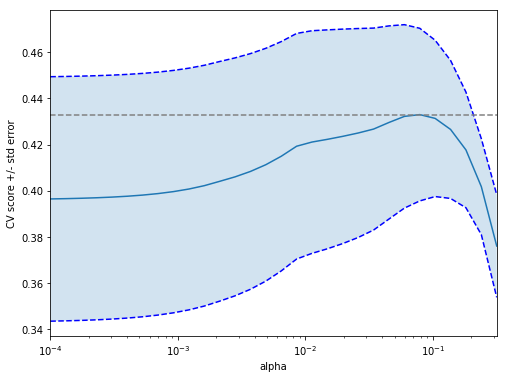

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)#用于创建等比数列，第一个参数表示10的-4次幂，第二个表示10的负0.5次幂，第三个参数表示需要30个数

tuned_parameters = [{'alpha': alphas}]
n_folds = 5 #设定交叉验证的折叠数位5折，即将数据集每次5等分

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)#使x轴为对数刻度

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

In [6]:
alphas = np.logspace(-4, -0.5, 30)
print(alphas)

[1.00000000e-04 1.32035178e-04 1.74332882e-04 2.30180731e-04
 3.03919538e-04 4.01280703e-04 5.29831691e-04 6.99564216e-04
 9.23670857e-04 1.21957046e-03 1.61026203e-03 2.12611233e-03
 2.80721620e-03 3.70651291e-03 4.89390092e-03 6.46167079e-03
 8.53167852e-03 1.12648169e-02 1.48735211e-02 1.96382800e-02
 2.59294380e-02 3.42359796e-02 4.52035366e-02 5.96845700e-02
 7.88046282e-02 1.04049831e-01 1.37382380e-01 1.81393069e-01
 2.39502662e-01 3.16227766e-01]
